In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
with open('chosen_matrices_to_plot_three_range_0_1.txt', 'rb') as f:
    three_motifs = pickle.load(f)
with open('chosen_matrices_to_plot_four_range_0_1.txt', 'rb') as f:
    four_motifs = pickle.load(f)
with open('asymmetry_msb_results.txt', 'rb') as f:
    all_results_asymmetry = pickle.load(f)

In [4]:
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [5]:
masked_array_0 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 three_motifs[1][(1,1.04,1.05)])
masked_array_1 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 three_motifs[4][(1,0.97,1.03)])
masked_array_2 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 three_motifs[4][(1,0.99,1.03)])
masked_array_3 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 three_motifs[0][(1,1.025,1.05)])
masked_array_4 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 three_motifs[2][(1,1,1.05)])

masked_array_5 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 four_motifs[-1][(1,1.025,1,1.05)])
masked_array_6 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 four_motifs[-1][(1,0.97,1.03,1.05)])
masked_array_7 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 four_motifs[2][(1,1.02,1.04,1.05)])
masked_array_8 = np.ma.masked_where(all_results_asymmetry[(0.0001, 0.03, 10)]['pM'] > 0.5, 
                                 four_motifs[-1][(1,1,1,1.03)])

In [13]:
noise_labels = ['$10^{-6}$', '1.6 $\cdot$ $10^{-5}$', '2.6 $\cdot$ $10^{-4}$', '4.2 $\cdot$ $10^{-3}$', '6.8 $\cdot$ $10^{-2}$', '0.95']
noise_labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','0.95']
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(99)
which_ticks = [convert_logspace(val, switching_rates, range_axis) for val in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.95]]

In [14]:
which_ticks

[0.0, 16.5627, 33.1254, 49.6881, 66.2409, 82.8036, 98.9901]

<ipython-input-28-5a228e2e671a>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(color='lightgrey')


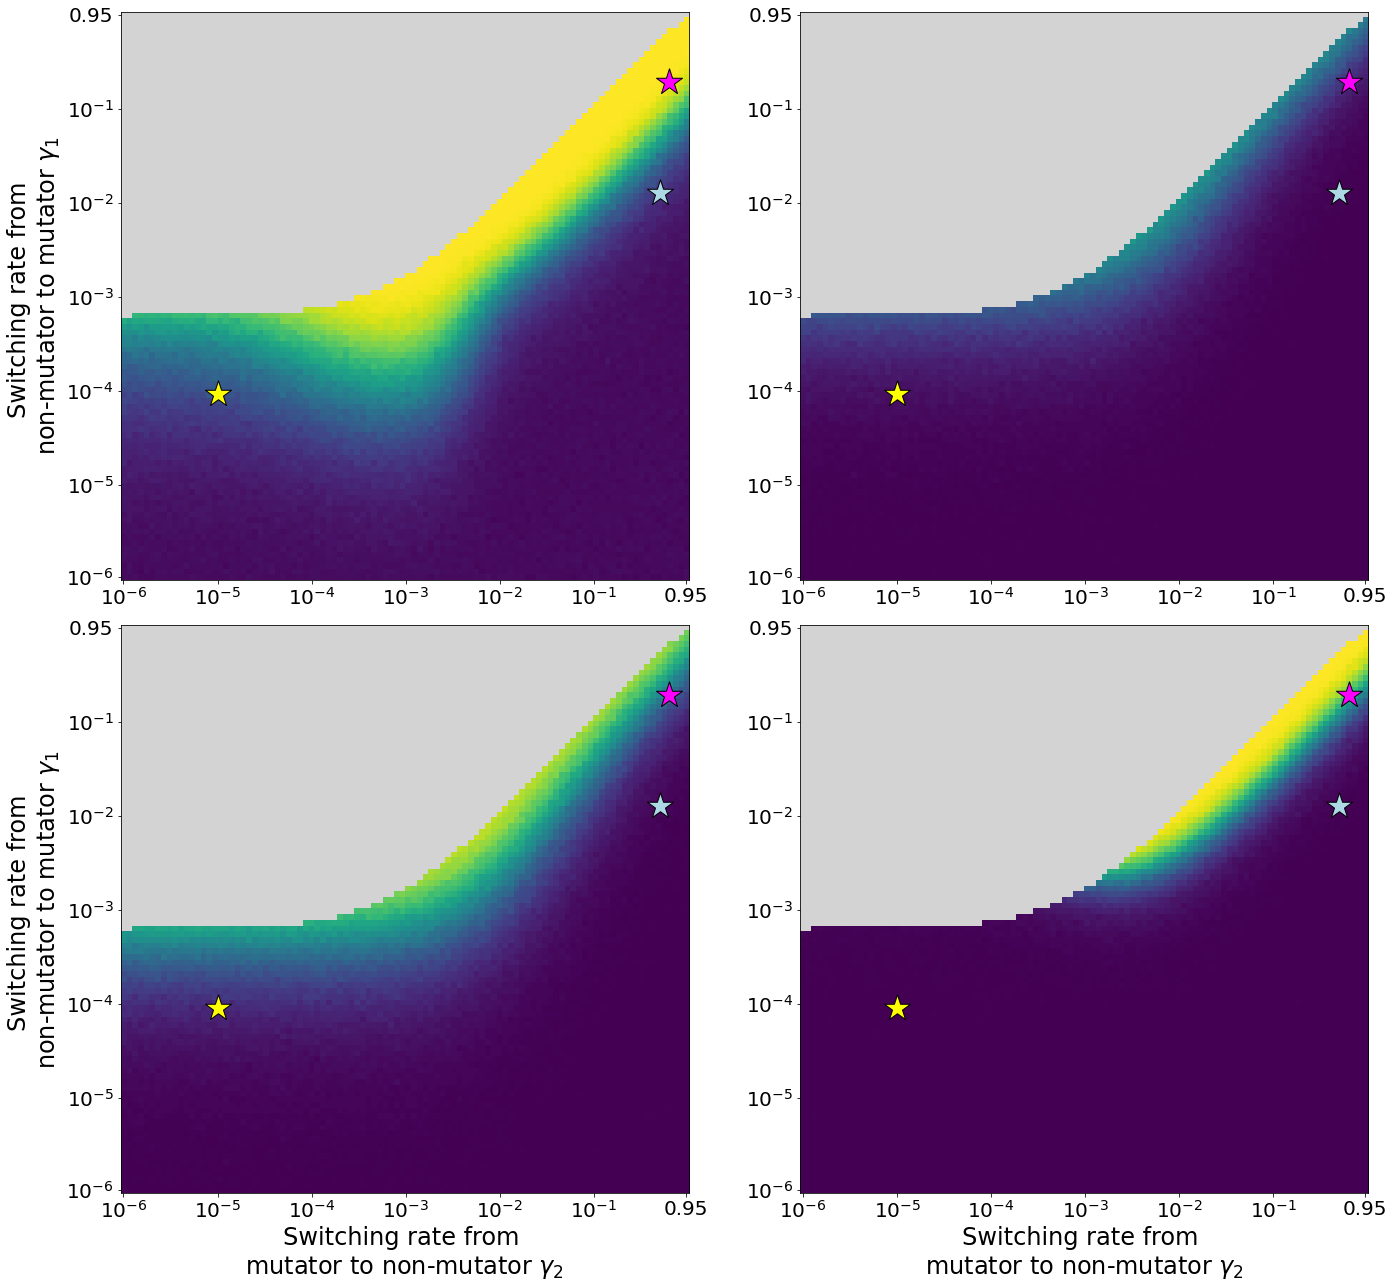

In [28]:
fig, ax = plt.subplots(2,2,figsize = (20,18))

cmap = matplotlib.cm.viridis
cmap.set_bad(color='lightgrey')

ax[0,0].imshow(masked_array_0, vmin = 0, vmax = 1000)
ax[0,1].imshow(masked_array_5, vmin = 0, vmax = 1000)

ax[1,0].imshow(masked_array_6, vmin = 0, vmax = 1000)
ax[1,1].imshow(masked_array_8, vmin = 0, vmax = 1000)


#ax[0,0].text(5,80, 'after 2000 generations', c = 'w', fontsize = 24)
#ax[0,1].text(5,80, 'after 3000 generations', c = 'w', fontsize = 24)
#ax[1,0].text(5,80, 'after 100,000 generations', c = 'w', fontsize = 24)
#ax[1,1].text(5,80, 'after 100,000 generations', c = 'w', fontsize = 24)

for i in range(2):
    for j in range(2):
        ax[i,0].set_ylabel('Switching rate from \nnon-mutator to mutator $\gamma_1$', fontsize = 24)
        ax[1,j].set_xlabel('Switching rate from \nmutator to non-mutator $\gamma_2$', fontsize = 24)
        ax[i,j].set_xticks(which_ticks)
        ax[i,j].set_xticklabels(noise_labels, fontsize = 20)
        ax[i,j].set_yticks(list(np.arange(0,100)[::20]) + [99])
        ax[i,j].set_yticks(which_ticks)
        ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 20)

        ax[i,j].scatter(convert_logspace(1e-5, switching_rates, range_axis),
                        100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 750, edgecolors = 'k')
        ax[i,j].scatter(convert_logspace(0.5, switching_rates, range_axis),
                        100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 750, edgecolors = 'k')
        ax[i,j].scatter(convert_logspace(0.63, switching_rates, range_axis),
                        100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s=750, edgecolors = 'k')


plt.tight_layout()
plt.savefig('figures/new_figure_3_range_0_1_JAN20.jpg', dpi = 600, bbox_inches = 'tight')

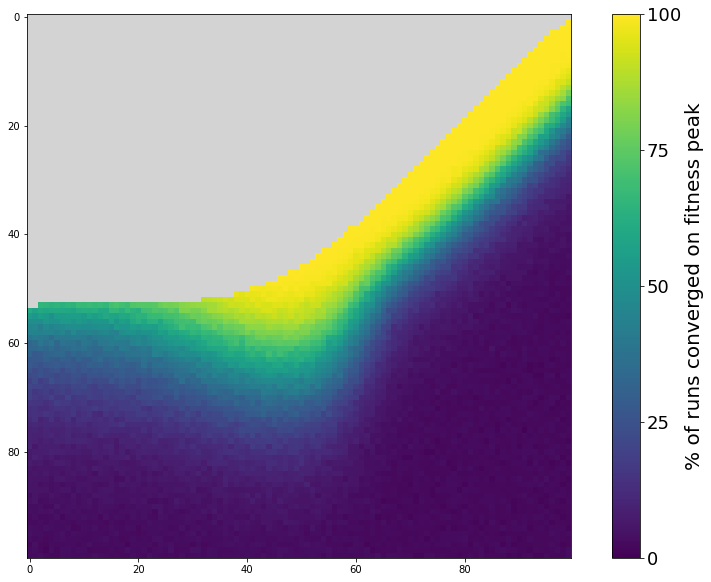

In [30]:
plots = plt.subplots(figsize = (15,10))

im = plt.imshow(masked_array_0, vmin = 0, vmax = 1000)
cbar = plt.colorbar(im)

cbar.set_ticks([0,250,500,750,1000])
cbar.set_ticklabels([0,25,50,75,100])
cbar.ax.tick_params(labelsize = 18)
cbar.set_label('% of runs converged on fitness peak', fontsize = 20)

plt.savefig('colorbar_figure3_JAN20.jpg', dpi = 400, bbox_inches = 'tight')

<ipython-input-47-283beb216669>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(color='lightgrey')


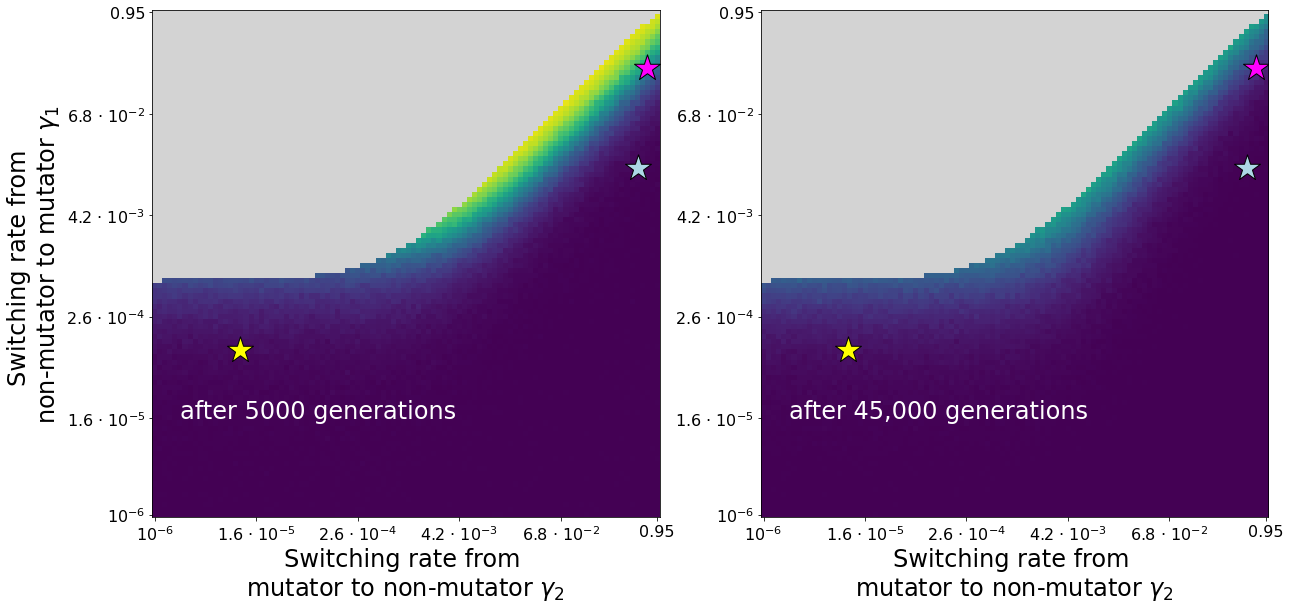

In [47]:
fig, ax = plt.subplots(1,2,figsize = (20,10))

cmap = matplotlib.cm.viridis
cmap.set_bad(color='lightgrey')

ax[0].imshow(masked_array_4, vmin = 0, vmax = 1000)
ax[1].imshow(masked_array_2, vmin = 0, vmax = 1000)

ax[0].text(5,80, 'after 5000 generations', c = 'w', fontsize = 24)
ax[1].text(5,80, 'after 45,000 generations', c = 'w', fontsize = 24)

for i in range(2):
    ax[0].set_ylabel('Switching rate from \nnon-mutator to mutator $\gamma_1$', fontsize = 24)
    ax[i].set_xlabel('Switching rate from \nmutator to non-mutator $\gamma_2$', fontsize = 24)
    ax[i].set_xticks(list(np.arange(0,100)[::20]) + [99])
    ax[i].set_xticklabels(noise_labels, fontsize = 16)
    ax[i].set_yticks(list(np.arange(0,100)[::20]) + [99])
    ax[i].set_yticklabels(noise_labels[::-1], fontsize = 16)

    ax[i].scatter(convert_logspace(1e-5, switching_rates, range_axis),
                    100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 750, edgecolors = 'k')
    ax[i].scatter(convert_logspace(0.5, switching_rates, range_axis),
                    100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 750, edgecolors = 'k')
    ax[i].scatter(convert_logspace(0.63, switching_rates, range_axis),
                    100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s=750, edgecolors = 'k')

plt.savefig('supplementary_figure3_JAN15.jpg', dpi = 400, bbox_inches = 'tight')